In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
df=pd.read_csv("E:\datasets\movies.csv")

In [4]:
df

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [34]:
from matplotlib.pyplot import boxplot
from pylab import rcParams

In [35]:
df = df.filter(['id', 'budget', 'revenue', 'runtime', 'cast', 'genres', 'release_year', 'original_title'])

In [36]:
df.head()

,id,budget,revenue,runtime,cast,genres,release_year,original_title
0,135397,150000000,1513528810,124,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,2015,Jurassic World
1,76341,150000000,378436354,120,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,2015,Mad Max: Fury Road
2,262500,110000000,295238201,119,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,2015,Insurgent
3,140607,200000000,2068178225,136,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy,2015,Star Wars: The Force Awakens
4,168259,190000000,1506249360,137,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller,2015,Furious 7


In [37]:
sum(df.duplicated())

1

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [38]:
df.drop_duplicates(inplace = True)
print("After Removing Duplicate Values (Rows,Columns) : ",df.shape)

After Removing Duplicate Values (Rows,Columns) :  (10865, 8)


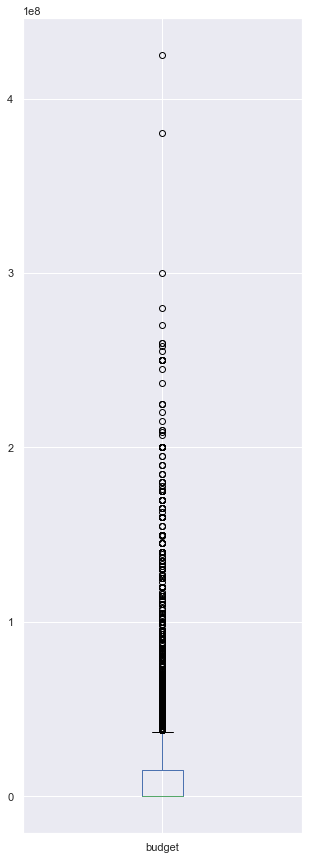

In [40]:
rcParams['figure.figsize'] = 5, 15
boxplot = df.boxplot(column=['budget'])

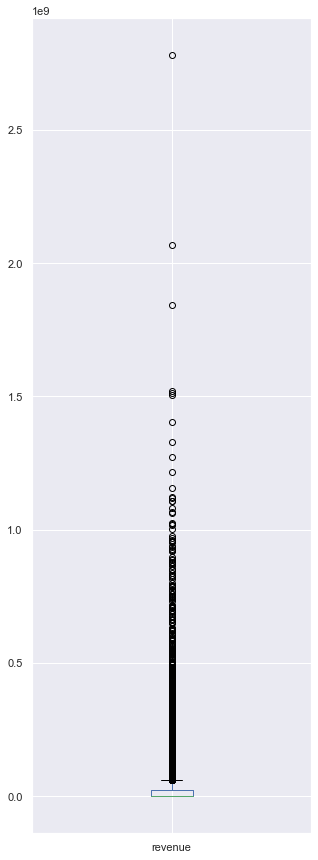

In [41]:
rcParams['figure.figsize'] = 5, 15
boxplot = df.boxplot(column=['revenue'])

In [42]:
df[df['revenue'] <= 0]

,id,budget,revenue,runtime,cast,genres,release_year,original_title
48,265208,30000000,0,92,Jason Statham|Michael Angarano|Milo Ventimigli...,Thriller|Crime|Drama,2015,Wild Card
67,334074,20000000,0,96,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,Crime|Thriller|Action,2015,Survivor
74,347096,0,0,108,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Action|Adventure|Fantasy,2015,Mythica: The Darkspore
75,308369,0,0,105,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Comedy|Drama,2015,Me and Earl and the Dying Girl
92,370687,0,0,0,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,Fantasy|Action|Adventure,2015,Mythica: The Necromancer
...,...,...,...,...,...,...,...,...
10861,21,0,0,95,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Documentary,1966,The Endless Summer
10862,20379,0,0,176,James Garner|Eva Marie Saint|Yves Montand|Tosh...,Action|Adventure|Drama,1966,Grand Prix
10863,39768,0,0,94,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Mystery|Comedy,1966,Beregis Avtomobilya
10864,21449,0,0,80,Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Action|Comedy,1966,"What's Up, Tiger Lily?"


In [43]:
df.drop(df[df['revenue'] <= 0].index, inplace = True)

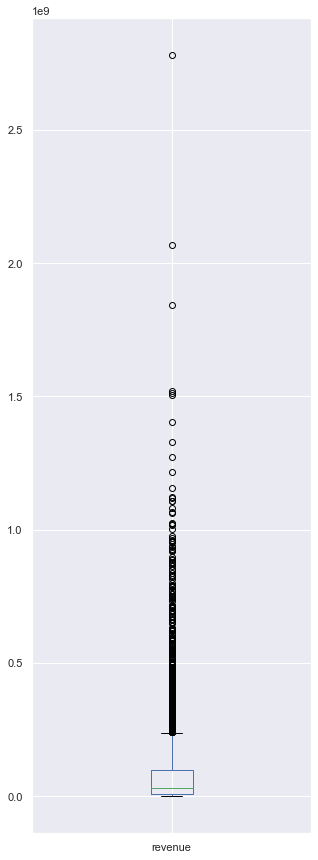

In [44]:
rcParams['figure.figsize'] = 5, 15
boxplot = df.boxplot(column=['revenue'])

# Q.1 Movie with third highest and lowest budget

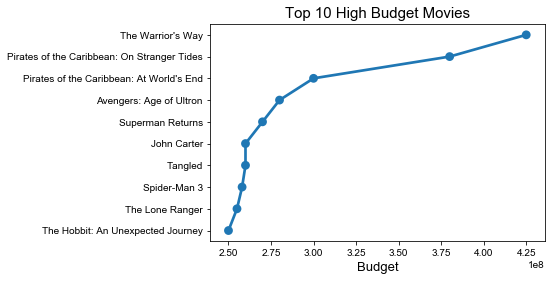

In [7]:

info = pd.DataFrame(df['budget'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))
x = list(data[:10])
y = list(info['budget'][:10])

#plot the figure and setup the title and labels.
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Budget Movies",fontsize = 15)
ax.set_xlabel("Budget",fontsize = 13)
sns.set_style("darkgrid")


In [8]:
df['budget'].nlargest(3)

2244    425000000
3375    380000000
7387    300000000
Name: budget, dtype: int64

In [9]:
df[df['budget'] == 300000000]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
7387,285,tt0449088,4.965391,300000000,961000000,Pirates of the Caribbean: At World's End,Johnny Depp|Orlando Bloom|Keira Knightley|Geof...,http://disney.go.com/disneypictures/pirates/,Gore Verbinski,"At the end of the world, the adventure begins.",...,"Captain Barbossa, long believed to be dead, ha...",169,Adventure|Fantasy|Action,Walt Disney Pictures|Jerry Bruckheimer Films|S...,5/19/07,2626,6.8,2007,3.155006e+08,1.010654e+09


In [10]:
df['budget'].nsmallest(3)

30    0
36    0
72    0
Name: budget, dtype: int64

In [11]:
df[df['budget'] == 15000]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
7447,23827,tt1179904,1.120442,15000,193355800,Paranormal Activity,Katie Featherston|Micah Sloat|Mark Fredrichs|A...,http://www.paranormalactivity-movie.com/,Oren Peli,What Happens When You Sleep?,...,"After a young, middle class couple moves into ...",86,Horror|Mystery,Blumhouse Productions|Solana Films,9/14/07,714,6.1,2007,15775.028739,2.033462e+08


# Q.2 Average no of words in movie between 2000-2005

In [12]:
df1 = df[(df['release_year']>=2000 ) & (df['release_year']<=2005)]

In [13]:
df1['number_of_words'] = df1.original_title.apply(lambda x: len(x.split()))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
df1.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,number_of_words
2633,120,tt0120737,8.575419,93000000,871368364,The Lord of the Rings: The Fellowship of the Ring,Elijah Wood|Ian McKellen|Viggo Mortensen|Liv T...,http://www.lordoftherings.net/,Peter Jackson,One ring to rule them all,...,178,Adventure|Fantasy|Action,WingNut Films|New Line Cinema|The Saul Zaentz ...,12/18/01,6079,7.8,2001,1.145284e+08,1.073080e+09,10
2634,671,tt0241527,8.021423,125000000,976475550,Harry Potter and the Philosopher's Stone,Daniel Radcliffe|Rupert Grint|Emma Watson|John...,http://harrypotter.warnerbros.com/harrypottera...,Chris Columbus,Let the Magic Begin.,...,152,Adventure|Fantasy|Family,1492 Pictures|Warner Bros.|Heyday Films,11/16/01,4265,7.2,2001,1.539360e+08,1.202518e+09,6
2635,1018,tt0166924,4.436367,15000000,20117339,Mulholland Drive,Naomi Watts|Laura Harring|Ann Miller|Dan Heday...,NaN,David Lynch,An actress longing to be a star. A woman searc...,...,147,Thriller|Drama|Mystery,Asymmetrical Productions|Les Films Alain Sarde...,5/16/01,709,7.4,2001,1.847232e+07,2.477426e+07,2
2636,141,tt0246578,3.851009,6000000,1270522,Donnie Darko,Jake Gyllenhaal|Patrick Swayze|Drew Barrymore|...,NaN,Richard Kelly,Dark. Darker. Darko.,...,113,Fantasy|Drama|Mystery,Pandora Cinema|Flower Films|Adam Fields Produc...,1/18/01,1777,7.5,2001,7.388929e+06,1.564633e+06,2
2637,585,tt0198781,3.204295,115000000,562816256,"Monsters, Inc.",John Goodman|Billy Crystal|Mary Gibbs|Steve Bu...,http://movies.disney.com/monsters-inc,Lee Unkrich|David Silverman|Pete Docter,We Scare Because We Care.,...,92,Fantasy|Animation|Family|Comedy,Walt Disney Pictures|Pixar Animation Studios,11/1/01,3899,7.3,2001,1.416211e+08,6.931015e+08,2


In [15]:
df1["number_of_words"].mean()

2.879668049792531

# Q.4 Most and Least Earned Revenue

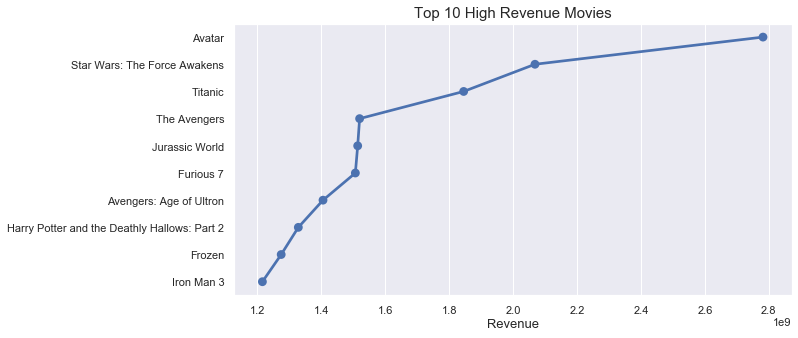

In [29]:

info = pd.DataFrame(df['revenue'].sort_values(ascending = False))
info['original_title'] = df['original_title']
data = list(map(str,(info['original_title'])))

x = list(data[:10])
y = list(info['revenue'][:10])

#make the scatter plot 
ax = sns.pointplot(x=y,y=x)
sns.set(rc={'figure.figsize':(10,5)})
ax.set_title("Top 10 High Revenue Movies",fontsize = 15)
ax.set_xlabel("Revenue",fontsize = 13)
sns.set_style("darkgrid")


In [47]:
minvalue = df['revenue'].min()

In [48]:
minvalue

2

In [49]:
maxvalue = df['revenue'].max()

In [50]:
maxvalue

2781505847

In [52]:
df[df['revenue'] == 2]

,id,budget,revenue,runtime,cast,genres,release_year,original_title
5067,13537,6000000,2,94,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Drama|History,2003,Shattered Glass
8142,2293,6000000,2,94,Jason Lee|Jeremy London|Shannen Doherty|Claire...,Romance|Comedy,1995,Mallrats


In [53]:
df[df['revenue'] == 2781505847]

,id,budget,revenue,runtime,cast,genres,release_year,original_title
1386,19995,237000000,2781505847,162,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Action|Adventure|Fantasy|Science Fiction,2009,Avatar


# Q.5---Average runtime of movies in the year 2006

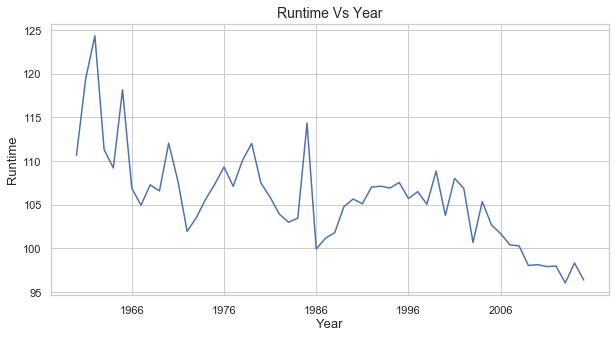

In [33]:
#Q.5---Average runtime of movies in the year 2006
df.groupby('release_year').mean()['runtime'].plot(xticks = np.arange(1966,2016,10))

#setup the figure size.
sns.set(rc={'figure.figsize':(10,5)})

#setup the title of the figure
plt.title("Runtime Vs Year",fontsize = 14)

#setup the x-label and y-label of the plot.
plt.xlabel('Year',fontsize = 13)
plt.ylabel('Runtime',fontsize = 13)
sns.set_style("whitegrid")



In [24]:
dfr = df[df['release_year'] == 2006]

In [51]:
dfr['runtime'].mean()

101.68382352941177

In [34]:
#average runtime duraion of the movies are around 101.68 Minutes.